In [16]:
%pylab inline

from collections import OrderedDict

from nltk.corpus import wordnet as wn
import networkx as nx
from networkx.algorithms.shortest_paths.generic import shortest_path_length as nx_shortest_path_length
from networkx.algorithms.shortest_paths.unweighted import single_source_shortest_path as nx_single_source_shortest_path
import pandas as pd
import seaborn as sns
from skimage.color import rgb2gray

palette = sns.cubehelix_palette(n_colors=5, light=0.75, rot=10, reverse=True)
sns.set(style='ticks', context='talk', font_scale=1.75, palette=palette)
fig_size = 8
fig_aspect = 2

Populating the interactive namespace from numpy and matplotlib


/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


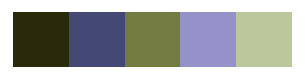

In [17]:
sns.palplot(palette)
f = plt.gca().figure
plt.axis('off')
f.canvas.draw()
width, height = f.get_size_inches() * f.get_dpi()
data = np.frombuffer(f.canvas.tostring_rgb(), dtype=np.uint8)
data = data.reshape((int(height), int(width), 3))

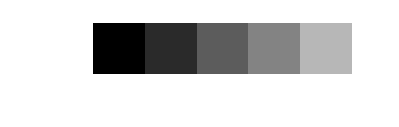

In [18]:
plt.imshow(rgb2gray(data), cmap='gray')
plt.axis('off');

# Image retrieval

## Final results

1       2       5       10      20
Dataset   Model                                                 
Flickr8k  Random          0.0010  0.0020  0.0050  0.0100  0.0200
          DeViSE          0.0590     NaN  0.2010  0.2960     NaN
          MMSOM-Word      0.0040  0.0085  0.0173  0.0316  0.0566
          MMSOM-Sentence  0.0114  0.0180  0.0396  0.0680  0.1072
Flickr30k Random          0.0010  0.0020  0.0050  0.0100  0.0200
          DeViSE          0.0670     NaN  0.2190  0.3270     NaN
          MMSOM-Word      0.0055  0.0091  0.0194  0.0321  0.0536
          MMSOM-Sentence  0.0054  0.0146  0.0296  0.0518  0.0864

,Dataset,Model,k,Flat hit @ k
0,Flickr8k,Random,1,0.0010
1,Flickr8k,DeViSE,1,0.0590
2,Flickr8k,MMSOM-Word,1,0.0040
3,Flickr8k,MMSOM-Sentence,1,0.0114
4,Flickr30k,Random,1,0.0010


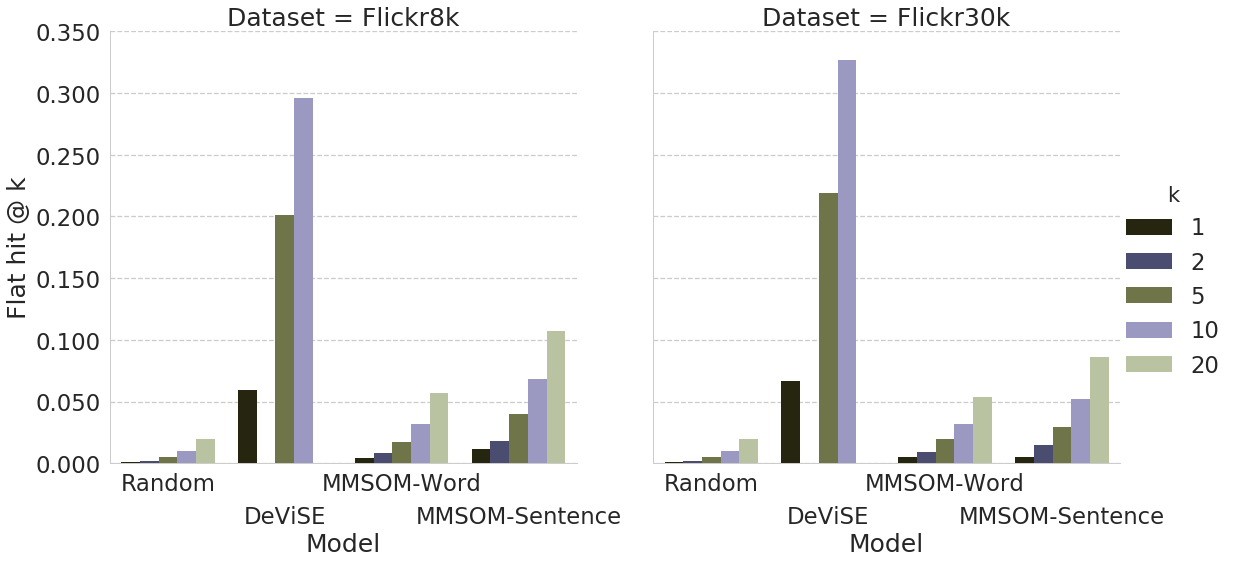

In [19]:
img_retrieval_idx = pd.MultiIndex(
    levels=(('Flickr8k', 'Flickr30k'), ('Random', 'DeViSE', 'MMSOM-Word', 'MMSOM-Sentence')),
    labels=((0, 0, 0, 0, 1, 1, 1, 1), (0, 1, 2, 3, 0, 1, 2, 3)),
    names=('Dataset', 'Model')
)

img_retrieval_col = pd.Index([1, 2, 5, 10, 20])

img_retrieval_results = pd.DataFrame(
    index=img_retrieval_idx,
    columns=img_retrieval_col,
    data=[
        [0.0010, 0.0020, 0.0050, 0.0100, 0.0200],
        [0.0590, np.nan, 0.2010, 0.2960, np.nan],
        [0.0040, 0.0085, 0.0173, 0.0316, 0.0566],
        [0.0114, 0.0180, 0.0396, 0.0680, 0.1072],

        [0.0010, 0.0020, 0.0050, 0.0100, 0.0200],
        [0.0670, np.nan, 0.2190, 0.3270, np.nan],
        [0.0055, 0.0091, 0.0194, 0.0321, 0.0536],
        [0.0054, 0.0146, 0.0296, 0.0518, 0.0864],
    ]
)
display(img_retrieval_results)

img_retrieval_results_flat = img_retrieval_results.reset_index()
img_retrieval_results_flat = img_retrieval_results_flat.melt(
    value_vars=[1, 2, 5, 10, 20],
    id_vars=['Dataset','Model'],
    value_name='Flat hit @ k',
    var_name='k'
)
display(img_retrieval_results_flat.head())

with sns.axes_style('whitegrid', rc={"grid.linestyle": '--'}):
    grid = sns.factorplot(x='Model', y='Flat hit @ k', hue='k', col='Dataset', kind='bar',
                          data=img_retrieval_results_flat, size=fig_size, aspect=fig_aspect/2)

ticks = np.arange(0, 0.4, 0.05)
for ax in grid.axes.flat:
    ax.set_yticks(ticks)
    ax.set_yticklabels([f'{i:0.3f}' for i in ticks])
    for i, label in enumerate(ax.get_xticklabels()):
        label.set_y(label.get_position()[1] - (i % 2) * 0.075)

## Failed results

,1,2,5,10,20
Model,,,,,
"no norm., no neighb.",0.0040,0.0085,0.0173,0.0316,0.0566
unit length norm.,0.0011,0.0017,0.0042,0.0079,0.0165
element no. norm.,0.0011,0.0018,0.0049,0.0103,0.0203
neighborhood,0.0019,0.0025,0.0027,0.0033,0.0034


,Model,k,Flat hit @ k
0,"no norm., no neighb.",1,0.0040
1,unit length norm.,1,0.0011
2,element no. norm.,1,0.0011
3,neighborhood,1,0.0019
4,"no norm., no neighb.",2,0.0085


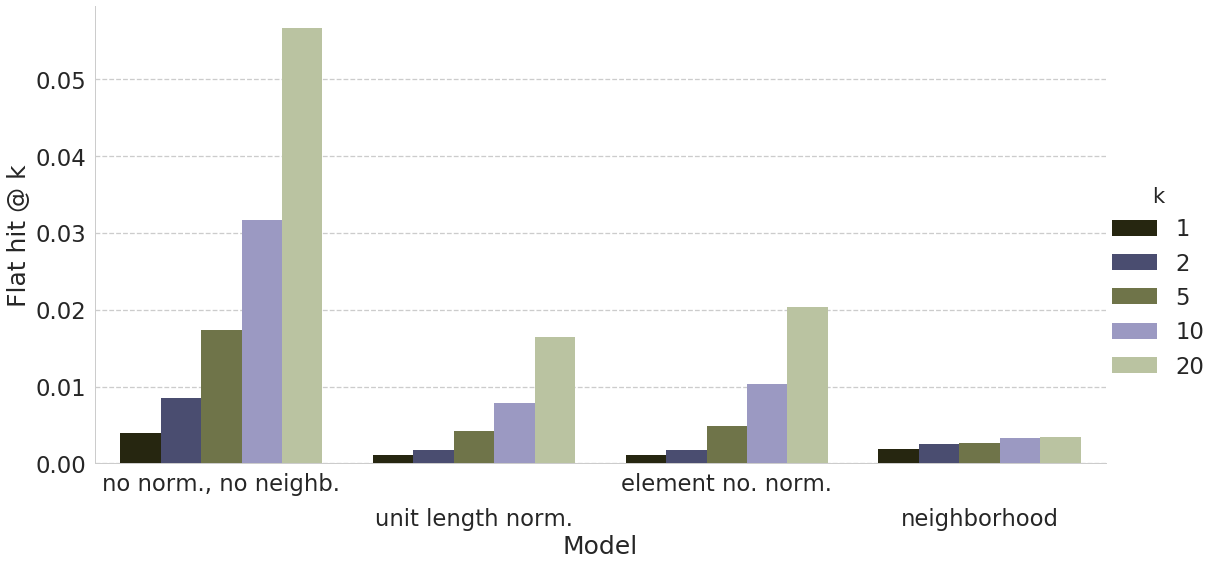

In [20]:
img_retrieval_fail_idx = pd.Index(
    ('no norm., no neighb.', 'unit length norm.',
     'element no. norm.', 'neighborhood'),
    name='Model'
)

img_retrieval_col = pd.Index([1, 2, 5, 10, 20])

img_retrieval_fail_results = pd.DataFrame(
    index=img_retrieval_fail_idx,
    columns=img_retrieval_col,
    data=[
        [0.0040, 0.0085, 0.0173, 0.0316, 0.0566],
        [0.0011, 0.0017, 0.0042, 0.0079, 0.0165],
        [0.0011, 0.0018, 0.0049, 0.0103, 0.0203],
        [0.0019, 0.0025, 0.0027, 0.0033, 0.0034],
    ]
)
display(img_retrieval_fail_results)


img_retrieval_fail_results_flat = img_retrieval_fail_results.reset_index()
img_retrieval_fail_results_flat = img_retrieval_fail_results_flat.melt(
    value_vars=[1, 2, 5, 10, 20],
    id_vars=['Model'],
    value_name='Flat hit @ k',
    var_name='k'
)
display(img_retrieval_fail_results_flat.head())


with sns.axes_style('whitegrid', rc={"grid.linestyle": '--'}):
    grid = sns.factorplot(x='Model', y='Flat hit @ k', hue='k', kind='bar',
                          data=img_retrieval_fail_results_flat, size=fig_size, aspect=fig_aspect)
for i, label in enumerate(grid.ax.get_xticklabels()):
    label.set_y(label.get_position()[1] - (i % 2) * 0.075)
sns.despine()

## Dataset info

Train   Test
Dataset   Model                        
Flickr8k  MMSOM-Word      108490  15172
          MMSOM-Sentence   35416   5000
Flickr30k MMSOM-Word      530682  17391
          MMSOM-Sentence  153915   5000

,Dataset,Model,Split,Set size
0,Flickr8k,MMSOM-Word,Train,108490
1,Flickr8k,MMSOM-Sentence,Train,35416
2,Flickr30k,MMSOM-Word,Train,530682
3,Flickr30k,MMSOM-Sentence,Train,153915
4,Flickr8k,MMSOM-Word,Test,15172
5,Flickr8k,MMSOM-Sentence,Test,5000
6,Flickr30k,MMSOM-Word,Test,17391
7,Flickr30k,MMSOM-Sentence,Test,5000


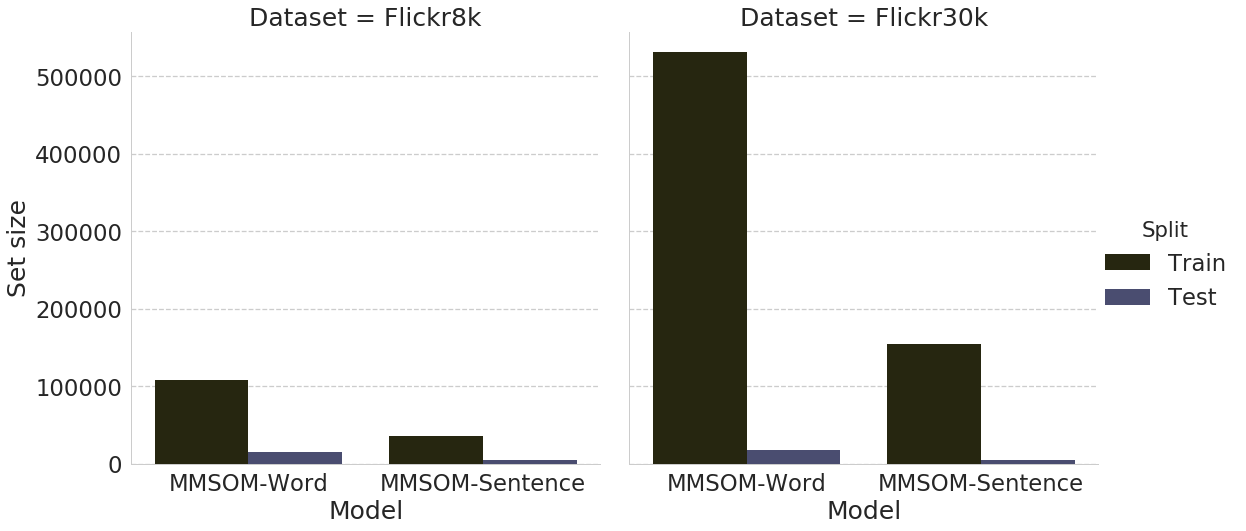

In [21]:
img_retrieval_data_idx = pd.MultiIndex(
    levels=(('Flickr8k', 'Flickr30k'), ('MMSOM-Word', 'MMSOM-Sentence')),
    labels=((0, 0, 1, 1), (0, 1, 0, 1)),
    names=('Dataset', 'Model')
)

img_retrieval_data_col = pd.Index(['Train', 'Test'])

img_retrieval_data_info = pd.DataFrame(
    index=img_retrieval_data_idx,
    columns=img_retrieval_data_col,
    data=[
        [108490, 15172],
        [35416, 5000],
        [530682, 17391],
        [153915, 5000],
    ]
)
display(img_retrieval_data_info)


img_retrieval_data_info_flat = img_retrieval_data_info.reset_index()
img_retrieval_data_info_flat = img_retrieval_data_info_flat.melt(
    value_vars=['Train', 'Test'],
    id_vars=['Dataset', 'Model'],
    value_name='Set size',
    var_name='Split'
)
display(img_retrieval_data_info_flat)



with sns.axes_style('whitegrid', rc={"grid.linestyle": '--'}):
    grid = sns.factorplot(x='Model', y='Set size', hue='Split', col='Dataset', kind='bar',
                          data=img_retrieval_data_info_flat, size=fig_size, aspect=fig_aspect/2)

## WordNet Graph

,parent_wnid,wnid
0,n02118333,n02119789
1,n02471300,n02478875
2,n02471762,n02473983
3,n02100399,n02100735
4,n02374149,n02390258


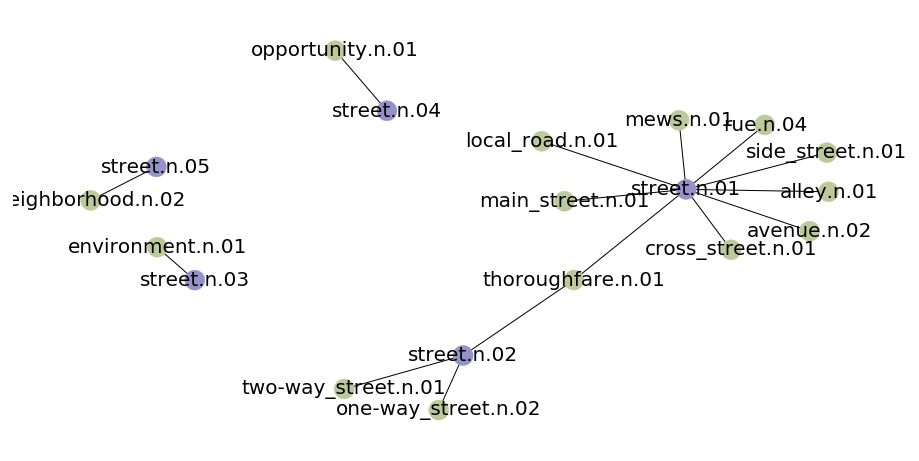

In [45]:
wn_is_a = pd.read_table('/data/master_thesis/wordnet.is_a.txt', names=['parent_wnid', 'wnid'], sep=' ')
display(wn_is_a.head())

g = nx.Graph()
g.add_edges_from(wn_is_a.as_matrix())
ss_street_roots = wn.synsets('street')
rel = lambda s: set(s.hypernyms()) | set(s.hyponyms())
ss_street_closure = [ss for root in ss_street_roots for ss in root.closure(rel, depth=1)]

node_set = OrderedDict([(f'{ss.pos()}{ss.offset():>08}', (ss.name(), palette[-2]))
                        for ss in ss_street_roots])
node_set.update([(f'{ss.pos()}{ss.offset():>08}', (ss.name(), palette[-1]))
                 for ss in ss_street_closure])

k = g.subgraph(list(node_set))
fig = plt.figure(figsize=(16, 8))
ax = fig.gca()
labels = OrderedDict([
    (n, v[0])
    for n, v in node_set.items()
])
nx.draw_networkx(k, pos=nx.spring_layout(k, iterations=18), ax=ax,
                 nodelist=[n for n in node_set if n in k.nodes],
                 labels=labels,
                 node_color=list(zip(*node_set.values()))[1],
                 node_size=400, font_size=20)
ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True)

# Image classification

,1,2,5,10
Model,,,,
Random,0.0010,0.0020,0.0050,0.0100
AlexNet,0.5565,0.6755,0.7906,0.8563
DeViSE500,0.5320,0.6520,0.7670,0.8330
DeViSE1000,0.5490,0.6690,0.7840,0.8500
MMSOM-W2V-CNN,0.5058,0.6249,0.7508,0.8233
MMSOM-CNN,0.5057,0.6247,0.7505,0.8234
MMSOM-W2V,0.0010,0.0020,0.0058,0.0111
MMSOM-NoNN,0.2279,0.3304,0.4867,0.6026
Centroids,0.4585,0.5764,0.7033,0.7821


,Model,k,Flat hit @ k
0,Random,1,0.0010
1,AlexNet,1,0.5565
2,DeViSE500,1,0.5320
3,DeViSE1000,1,0.5490
4,MMSOM-W2V-CNN,1,0.5058


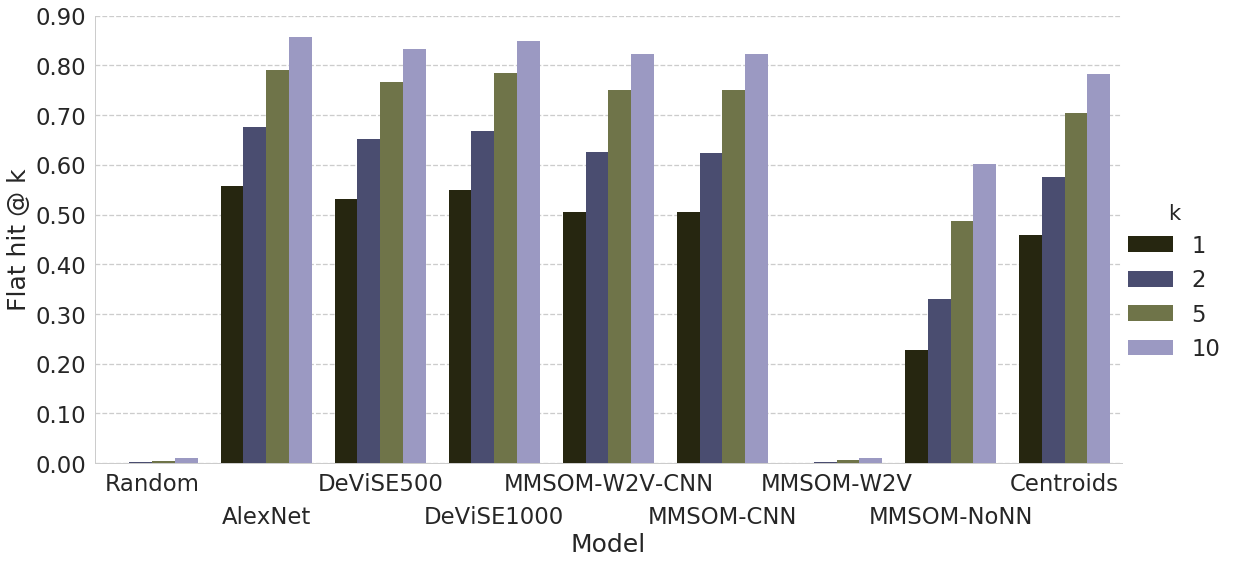

In [22]:
img_classf_idx = pd.Index(
    ('Random', 'AlexNet', 'DeViSE500', 'DeViSE1000',
     'MMSOM-W2V-CNN', 'MMSOM-CNN', 'MMSOM-W2V',
     'MMSOM-NoNN', 'Centroids'),
    name='Model'
)

img_classf_col = pd.Index([1, 2, 5, 10])

img_classf_results = pd.DataFrame(
    index=img_classf_idx,
    columns=img_classf_col,
    data=[
        [0.0010, 0.0020, 0.0050, 0.0100],
        [0.5565, 0.6755, 0.7906, 0.8563],
        [0.5320, 0.6520, 0.7670, 0.8330],
        [0.5490, 0.6690, 0.7840, 0.8500],
        [0.5058, 0.6249, 0.7508, 0.8233],
        [0.5057, 0.6247, 0.7505, 0.8234],
        [0.0010, 0.0020, 0.0058, 0.0111],
        [0.2279, 0.3304, 0.4867, 0.6026],
        [0.4585, 0.5764, 0.7033, 0.7821],
    ]
)
display(img_classf_results)


img_classf_results_flat = img_classf_results.reset_index()
img_classf_results_flat = img_classf_results_flat.melt(
    value_vars=[1, 2, 5, 10],
    id_vars=['Model'],
    value_name='Flat hit @ k',
    var_name='k'
)
display(img_classf_results_flat.head())


with sns.axes_style('whitegrid', rc={"grid.linestyle": '--'}):
    grid = sns.factorplot(x='Model', y='Flat hit @ k', hue='k', kind='bar',
                          data=img_classf_results_flat, size=fig_size, aspect=fig_aspect)

ticks = np.arange(0, 0.91, 0.1)
for ax in grid.axes.flat:
    ax.set_yticks(ticks)
    ax.set_yticklabels([f'{i:0.2f}' for i in ticks])
    for i, label in enumerate(ax.get_xticklabels()):
        label.set_y(label.get_position()[1] - (i % 2) * 0.075)
sns.despine()

# Zero-shot learning

## Flat hit @ k

1       2       5       10      20
Dataset              Model                                         
ImageNet 1K - 2 Hops Random  0.0001  0.0003  0.0007  0.0014  0.0029
                     MMSOM   0.0032  0.0045  0.0075  0.0104  0.0141
ImageNet 1K - 3 Hops Random  0.0001  0.0002  0.0005  0.0009  0.0019
                     MMSOM   0.0023  0.0032  0.0051  0.0066  0.0093
ImageNet 21K         Random  0.0000  0.0001  0.0002  0.0005  0.0009
                     MMSOM   0.0011  0.0016  0.0026  0.0036  0.0046

,Dataset,Model,k,Flat hit @ k
0,ImageNet 1K - 2 Hops,Random,1,0.0001
1,ImageNet 1K - 2 Hops,MMSOM,1,0.0032
2,ImageNet 1K - 3 Hops,Random,1,0.0001
3,ImageNet 1K - 3 Hops,MMSOM,1,0.0023
4,ImageNet 21K,Random,1,0.0000


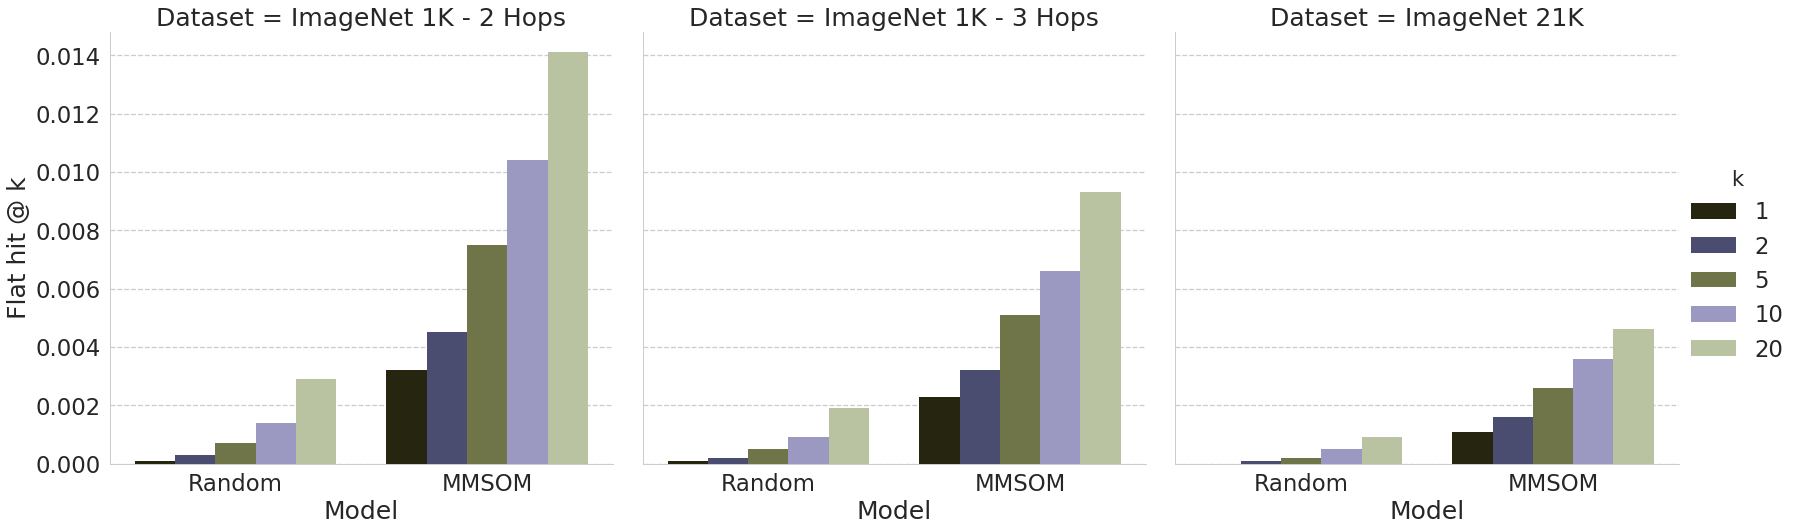

In [49]:
zero_shot_flat_idx = pd.MultiIndex(
    levels=(('ImageNet 1K - 2 Hops', 'ImageNet 1K - 3 Hops', 'ImageNet 21K'),
            ('Random', 'MMSOM')),
    labels=((0, 0, 1, 1, 2, 2), (0, 1, 0, 1, 0, 1)),
    names=('Dataset', 'Model')
)


zero_shot_flat_col = pd.Index([1, 2, 5, 10, 20])

zero_shot_flat_results = pd.DataFrame(
    index=zero_shot_flat_idx,
    columns=zero_shot_flat_col,
    data=[
        [0.0001, 0.0003, 0.0007, 0.0014, 0.0029],
        [0.0032, 0.0045, 0.0075, 0.0104, 0.0141],
        [0.0001, 0.0002, 0.0005, 0.0009, 0.0019],
        [0.0023, 0.0032, 0.0051, 0.0066, 0.0093],
        [0.0000, 0.0001, 0.0002, 0.0005, 0.0009],
        [0.0011, 0.0016, 0.0026, 0.0036, 0.0046],
    ]
)
display(zero_shot_flat_results)


zero_shot_flat_results_flat = zero_shot_flat_results.reset_index()
zero_shot_flat_results_flat = zero_shot_flat_results_flat.melt(
    value_vars=[1, 2, 5, 10, 20],
    id_vars=['Dataset', 'Model'],
    value_name='Flat hit @ k',
    var_name='k'
)
display(zero_shot_flat_results_flat.head())


with sns.axes_style('whitegrid', rc={"grid.linestyle": '--'}):
    grid = sns.factorplot(x='Model', y='Flat hit @ k', hue='k', col='Dataset', kind='bar',
                          data=zero_shot_flat_results_flat, size=fig_size, aspect=fig_aspect/2)

ticks = np.arange(0, 0.016, 0.002)
for ax in grid.axes.flat:
    ax.set_yticks(ticks)
    ax.set_yticklabels([f'{i:0.3f}' for i in ticks])
sns.despine()

## Hierarchical hit @ k

2       5       10      20
Dataset              Model                                 
ImageNet 1K - 2 Hops Random  0.0005  0.0039  0.0051  0.0072
                     MMSOM   0.0046  0.0174  0.0174  0.0164
ImageNet 1K - 3 Hops Random  0.0003  0.0023  0.0033  0.0049
                     MMSOM   0.0034  0.0115  0.0125  0.0130
ImageNet 21K         Random  0.0002  0.0013  0.0021  0.0032
                     MMSOM   0.0016  0.0043  0.0048  0.0052

,Dataset,Model,k,Hierarchical hit @ k
0,ImageNet 1K - 2 Hops,Random,2,0.0005
1,ImageNet 1K - 2 Hops,MMSOM,2,0.0046
2,ImageNet 1K - 3 Hops,Random,2,0.0003
3,ImageNet 1K - 3 Hops,MMSOM,2,0.0034
4,ImageNet 21K,Random,2,0.0002


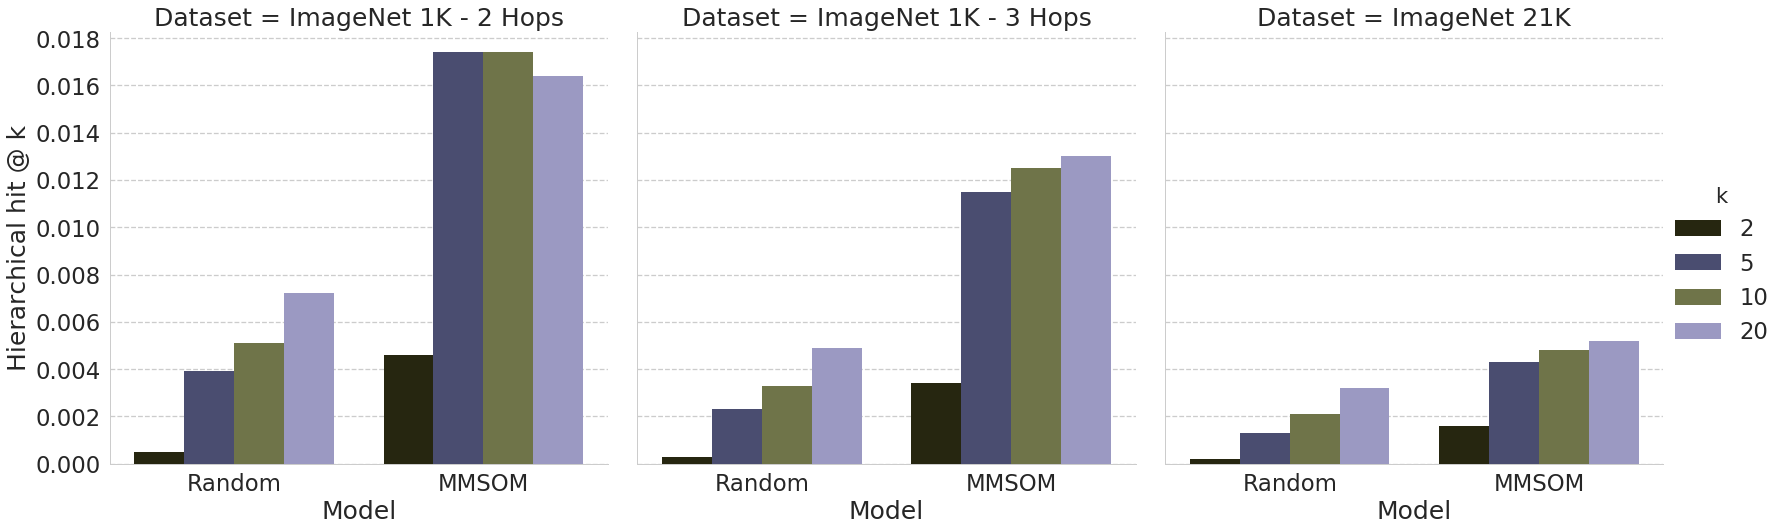

In [27]:
zero_shot_h_idx = pd.MultiIndex(
    levels=(('ImageNet 1K - 2 Hops', 'ImageNet 1K - 3 Hops', 'ImageNet 21K'),
            ('Random', 'MMSOM')),
    labels=((0, 0, 1, 1, 2, 2), (0, 1, 0, 1, 0, 1)),
    names=('Dataset', 'Model')
)


zero_shot_h_col = pd.Index([2, 5, 10, 20])

zero_shot_h_results = pd.DataFrame(
    index=zero_shot_h_idx,
    columns=zero_shot_h_col,
    data=[
        [0.0005, 0.0039, 0.0051, 0.0072],
        [0.0046, 0.0174, 0.0174, 0.0164],
        [0.0003, 0.0023, 0.0033, 0.0049],
        [0.0034, 0.0115, 0.0125, 0.0130],

        [0.0002, 0.0013, 0.0021, 0.0032],
        [0.0016, 0.0043, 0.0048, 0.0052],
    ]
)
display(zero_shot_h_results)


zero_shot_h_results_flat = zero_shot_h_results.reset_index()
zero_shot_h_results_flat = zero_shot_h_results_flat.melt(
    value_vars=[2, 5, 10, 20],
    id_vars=['Dataset', 'Model'],
    value_name='Hierarchical hit @ k',
    var_name='k'
)
display(zero_shot_h_results_flat.head())


with sns.axes_style('whitegrid', rc={"grid.linestyle": '--'}):
    grid = sns.factorplot(x='Model', y='Hierarchical hit @ k', hue='k', col='Dataset', kind='bar',
                          data=zero_shot_h_results_flat, size=fig_size, aspect=fig_aspect/2)

ticks = np.arange(0, 0.02, 0.002)
for ax in grid.axes.flat:
    ax.set_yticks(ticks)
    ax.set_yticklabels([f'{i:0.3f}' for i in ticks])
sns.despine()

## Dataset info

,#Unique classes,2,5,10,20
Dataset,,,,,
ImageNet 1K - 2 Hops,6989,3.587,26.586,35.472,50.122
ImageNet 1K - 3 Hops,10705,3.320,24.992,35.824,52.001
ImageNet 21K,21841,5.350,30.160,46.517,70.111


,Dataset,#Unique classes,k,Mean CorrectSet size @ k
0,ImageNet 1K - 2 Hops,6989,2,3.587
1,ImageNet 1K - 3 Hops,10705,2,3.320
2,ImageNet 21K,21841,2,5.350
3,ImageNet 1K - 2 Hops,6989,5,26.586
4,ImageNet 1K - 3 Hops,10705,5,24.992
5,ImageNet 21K,21841,5,30.160
6,ImageNet 1K - 2 Hops,6989,10,35.472
7,ImageNet 1K - 3 Hops,10705,10,35.824
8,ImageNet 21K,21841,10,46.517
9,ImageNet 1K - 2 Hops,6989,20,50.122


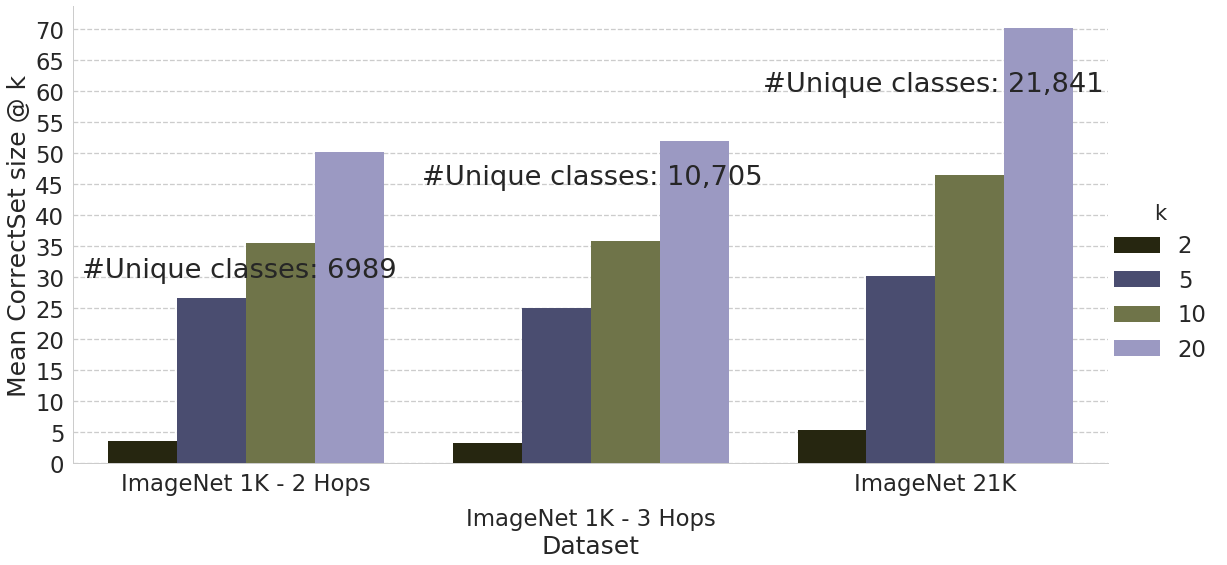

In [29]:
zero_shot_data_idx = pd.Index(
    ('ImageNet 1K - 2 Hops', 'ImageNet 1K - 3 Hops', 'ImageNet 21K'),
    name='Dataset'
)

zero_shot_data_col = pd.Index(['#Unique classes', 2, 5, 10, 20])

zero_shot_data_info = pd.DataFrame(
    index=zero_shot_data_idx,
    columns=zero_shot_data_col,
    data=[
        [6989, 3.587, 26.586, 35.472, 50.122],
        [10705, 3.32, 24.992, 35.824, 52.001],
        [21841, 5.35, 30.160, 46.517, 70.111],
    ]
)
display(zero_shot_data_info)


zero_shot_data_info_flat = zero_shot_data_info.reset_index()
zero_shot_data_info_flat = zero_shot_data_info_flat.melt(
    value_vars=[2, 5, 10, 20],
    id_vars=['Dataset', '#Unique classes'],
    value_name='Mean CorrectSet size @ k',
    var_name='k'
)
display(zero_shot_data_info_flat)


with sns.axes_style('whitegrid', rc={"grid.linestyle": '--'}):
    grid = sns.factorplot(x='Dataset', y='Mean CorrectSet size @ k', hue='k', kind='bar',
                          data=zero_shot_data_info_flat, size=fig_size, aspect=fig_aspect)

ticks = np.arange(0, 75, 5)
for ax in grid.axes.flat:
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticks)
    ax.annotate('#Unique classes: 6989', (-0.475, 30))
    ax.annotate('#Unique classes: 10,705', (0.51, 45))
    ax.annotate('#Unique classes: 21,841', (1.5, 60))
    for i, label in enumerate(ax.get_xticklabels()):
        label.set_y(label.get_position()[1] - (i % 2) * 0.075)
sns.despine()